In [46]:
!pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:

!pip install google_play_scraper
!pip install textblob
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import pickle
import re
import time
import datetime
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style
plt.rcParams["figure.figsize"] = (15,10)

In [31]:
from google_play_scraper import reviews_all, Sort

kaireview_reviews = reviews_all(
    'com.kai.kaiticketing',
    sleep_milliseconds=0,
    lang='id',
    sort=Sort.NEWEST
)

In [33]:
#Save kai access reviews into dataframe 
df_kai = pd.DataFrame(np.array(kaireview_reviews),columns=['content']) 
df_kai = df_kai.join(pd.DataFrame(df_kai.pop('content').tolist())) 
df_kai.to_csv(r'df_kai_raw', index=False)

In [34]:
# Check dataframe
df_kai

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,af2090ce-89b5-44e9-a31c-536c653112dd,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,6.13.2,2025-09-07 19:46:30,None,NaT,6.13.2
1,d7412253-c324-4d7d-82bc-290578af2ce0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,susah di pemulihan akun..,5,0,6.12.1,2025-09-07 19:41:04,None,NaT,6.12.1
2,9a9d571c-8f09-4c88-97c2-b35ceb59a0b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ribet harus ada member basic, begitu daftar ma...",1,0,6.13.2,2025-09-07 19:13:44,None,NaT,6.13.2
3,03059de2-2e1e-4130-a747-9ab7bfec340e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Akses info perjalanan dengan kereta api lebih ...,5,0,6.13.2,2025-09-07 17:50:35,None,NaT,6.13.2
4,32e2ac82-3979-4640-9b92-e5fe83da96e2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantul,4,0,6.13.2,2025-09-07 17:29:34,None,NaT,6.13.2
...,...,...,...,...,...,...,...,...,...,...,...
108839,f83457d0-e803-47f9-bce3-6dbca29120bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Good,5,0,1.0.0.1,2014-07-16 11:59:56,None,NaT,1.0.0.1
108840,622fb470-1237-41a0-be5f-43a72d59364d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Keren,5,0,1.0.0.1,2014-07-16 11:36:16,None,NaT,1.0.0.1
108841,77683699-4e3d-4ece-bf2c-9e956e8c9eb8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Semoga segera di fix kan gangguan bug di app,5,0,1.0.0.1,2014-07-16 11:29:55,None,NaT,1.0.0.1
108842,8bedf713-ff51-4fcc-815d-39d30d47ccf0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu,4,0,1.0.0.1,2014-07-16 11:24:14,None,NaT,1.0.0.1


In [35]:

df_kai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108844 entries, 0 to 108843
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              108844 non-null  object        
 1   userName              108844 non-null  object        
 2   userImage             108844 non-null  object        
 3   content               108833 non-null  object        
 4   score                 108844 non-null  int64         
 5   thumbsUpCount         108844 non-null  int64         
 6   reviewCreatedVersion  87625 non-null   object        
 7   at                    108844 non-null  datetime64[ns]
 8   replyContent          12508 non-null   object        
 9   repliedAt             12508 non-null   datetime64[ns]
 10  appVersion            87625 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.1+ MB


In [36]:
#We do not need data for column reviewId, userName, userImage so we will show only these column
df_kai.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,good,5,0,6.13.2,2025-09-07 19:46:30,None,NaT
1,susah di pemulihan akun..,5,0,6.12.1,2025-09-07 19:41:04,None,NaT
2,"ribet harus ada member basic, begitu daftar ma...",1,0,6.13.2,2025-09-07 19:13:44,None,NaT
3,Akses info perjalanan dengan kereta api lebih ...,5,0,6.13.2,2025-09-07 17:50:35,None,NaT
4,mantul,4,0,6.13.2,2025-09-07 17:29:34,None,NaT
...,...,...,...,...,...,...,...
108839,Good,5,0,1.0.0.1,2014-07-16 11:59:56,None,NaT
108840,Keren,5,0,1.0.0.1,2014-07-16 11:36:16,None,NaT
108841,Semoga segera di fix kan gangguan bug di app,5,0,1.0.0.1,2014-07-16 11:29:55,None,NaT
108842,Sangat membantu,4,0,1.0.0.1,2014-07-16 11:24:14,None,NaT


In [50]:
#Check number of reviews scores
df_kai['score'].value_counts()

score
1    50336
5    35165
2     9588
3     7229
4     6526
Name: count, dtype: int64

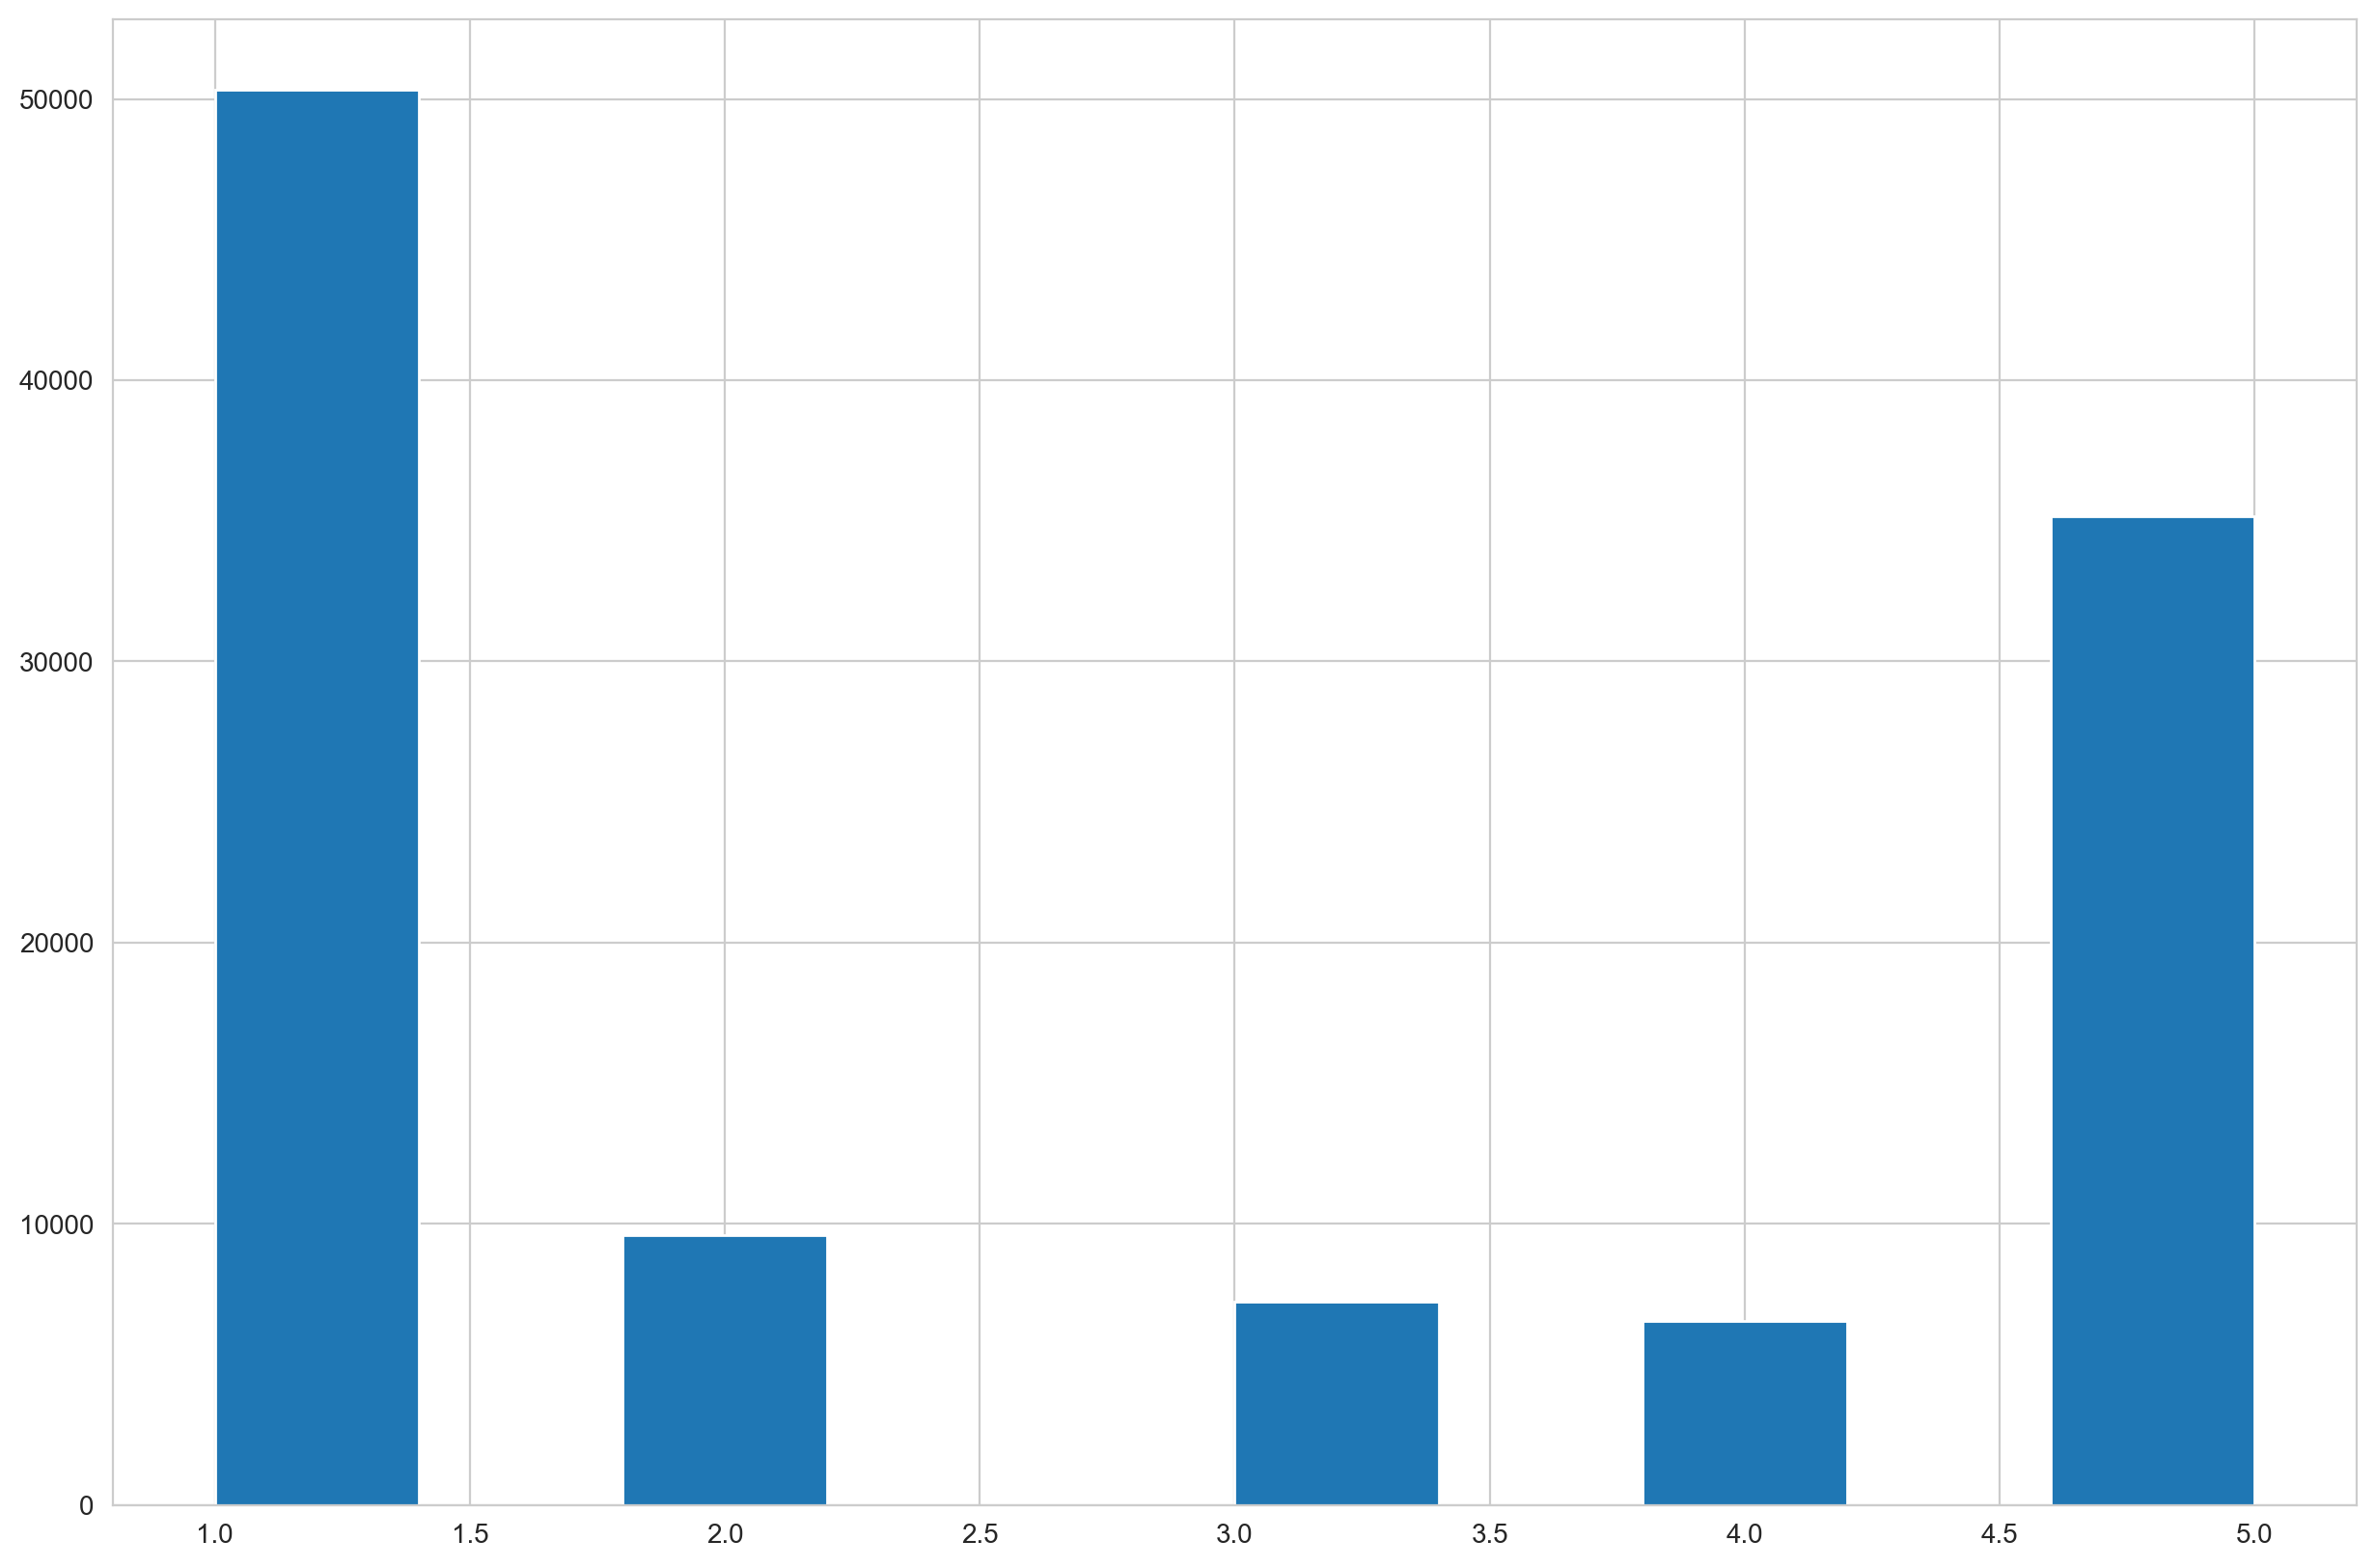

In [52]:
plt.hist(df_kai['score'])
plt.show()

In [55]:
# Lower casing
# Change the reviews type to string
df_kai['content'] = df_kai['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_kai['content'][188])
print(df_kai['content'][1])
print(df_kai['content'][1000])

Aplikasi tidak bermutu, lama ga di buka minta update apaan kan makan quota jadinya
susah di pemulihan akun..
Aplikasi yang sangat bagus sekali.. membantu saya membelibtiket dengan mudah, cepat, dan aman..


In [56]:
#Lowercase all reviews to see the difference
df_kai['content']= df_kai['content'].apply(lambda x: x.lower())
print(df_kai['content'][188])
print(df_kai['content'][1])
print(df_kai['content'][1000])

aplikasi tidak bermutu, lama ga di buka minta update apaan kan makan quota jadinya
susah di pemulihan akun..
aplikasi yang sangat bagus sekali.. membantu saya membelibtiket dengan mudah, cepat, dan aman..


In [58]:

import nltk
from nltk.tokenize import word_tokenize

# pastikan resource punkt udah ada
nltk.download('punkt_tab')

# bikin kolom baru 'tokens' hasil tokenisasi
df_kai['tokens'] = df_kai['content'].apply(word_tokenize)

# cek hasilnya
print(df_kai[['content', 'tokens']].head(10))


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fajri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                             content  \
0                                               good   
1                          susah di pemulihan akun..   
2  ribet harus ada member basic, begitu daftar ma...   
3  akses info perjalanan dengan kereta api lebih ...   
4                                             mantul   
5          aplikasi cacad kai, lemot, gk layak pakai   
6  baru juga di instal eh malah gag bisa di pakek...   
7                                              bagus   
8                                                top   
9  tolong beri metode pembayaran yang lain sepert...   

                                              tokens  
0                                             [good]  
1                   [susah, di, pemulihan, akun, ..]  
2  [ribet, harus, ada, member, basic, ,, begitu, ...  
3  [akses, info, perjalanan, dengan, kereta, api,...  
4                                           [mantul]  
5  [aplikasi, cacad, kai, ,, lemot, ,, gk, layak,... 

In [59]:

# function to plot most frequent terms
def freq_words(x, terms=30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    # Import FreqDist from nltk.probability
    from nltk.probability import FreqDist
    fdist = FreqDist(all_words)

    words_df = pd.DataFrame({
        'word': list(fdist.keys()),
        'count': list(fdist.values())
    })

    # selecting top N most frequent words
    d = words_df.nlargest(columns="count", n=terms)

    plt.figure(figsize=(20, 5))
    # Use the 'rainbow' colormap for the bar plot
    ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")
    ax.set(ylabel='Count')

    # Tambahin title
    plt.title(f"Most Frequent Words (Before Stop Words Removal) - Top {terms}")

    plt.show()
     

C:\Users\fajri\AppData\Local\Temp\ipykernel_27876\1573588741.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="word", y="count", palette="rainbow")


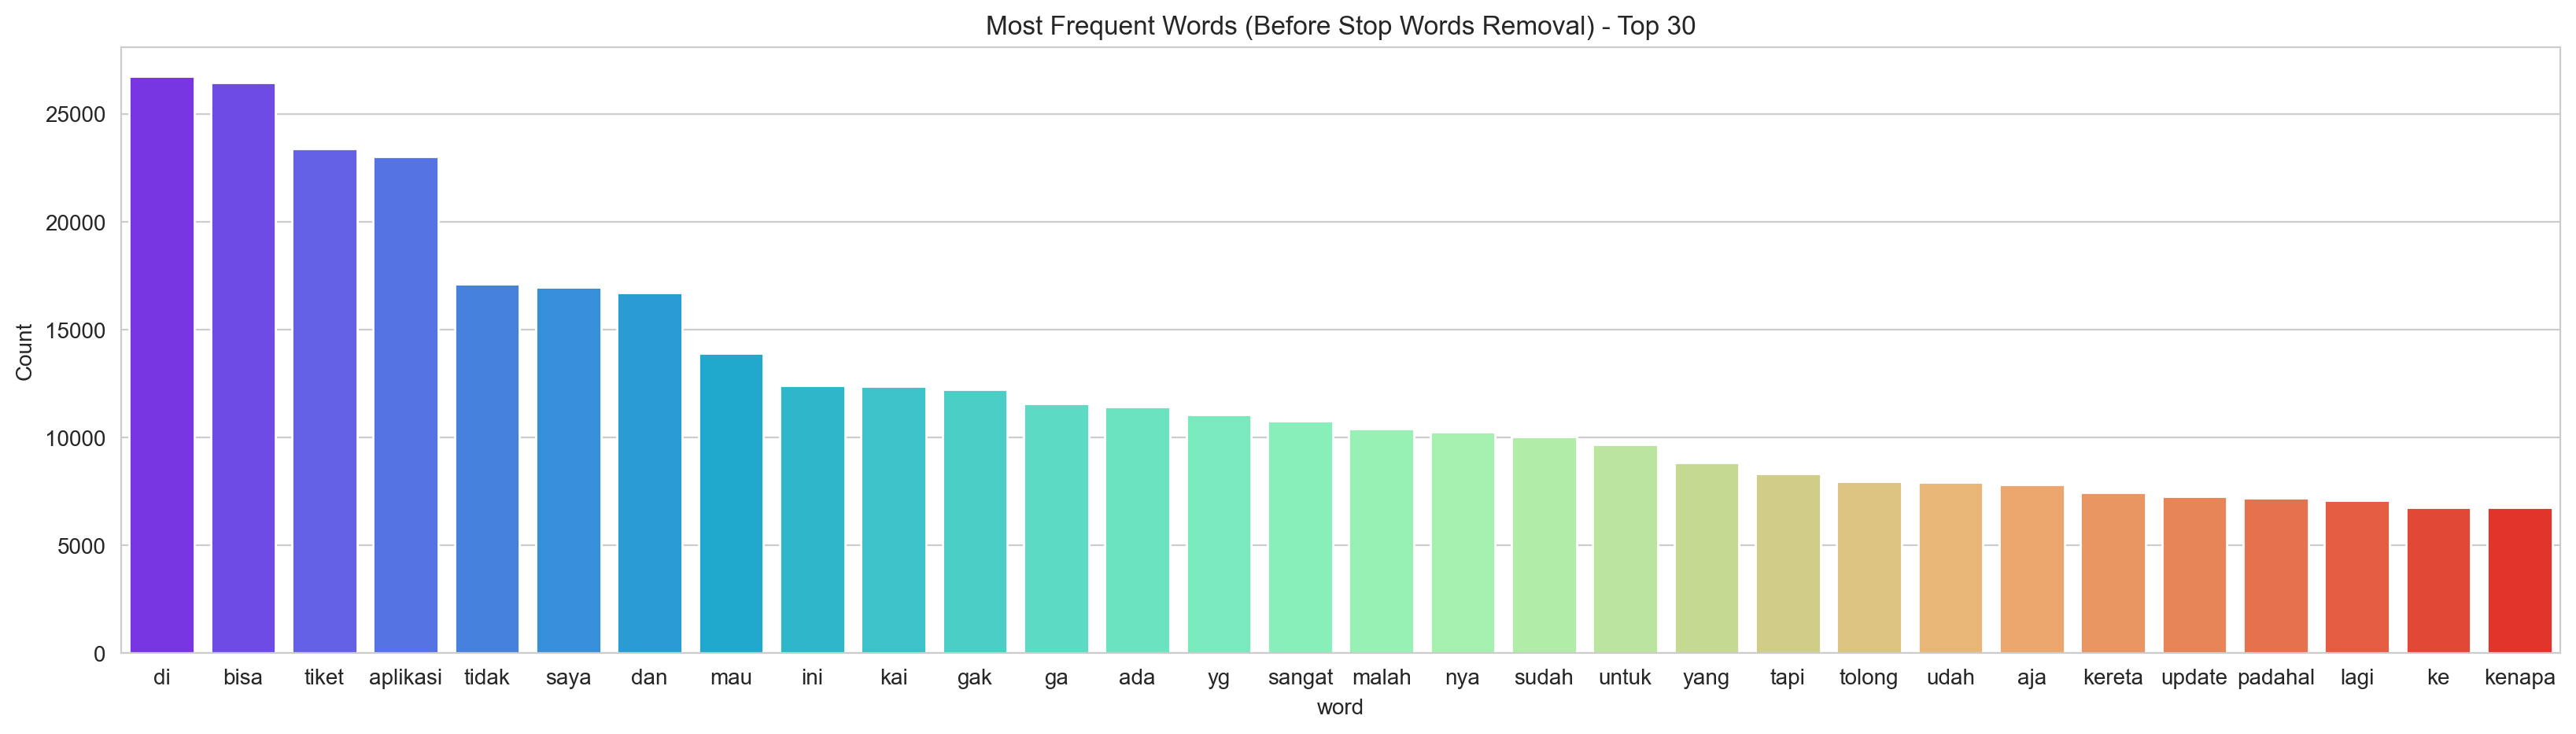

In [60]:
freq_words(df_kai['content'])

In [61]:

import nltk
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fajri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [62]:
# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


,Word,Frequency
0,tiket,23406
1,aplikasi,23024
2,kai,12392
3,gak,12245
4,ga,11571
...,...,...
95,no,1514
96,parah,1492
97,suka,1483
98,langsung,1479


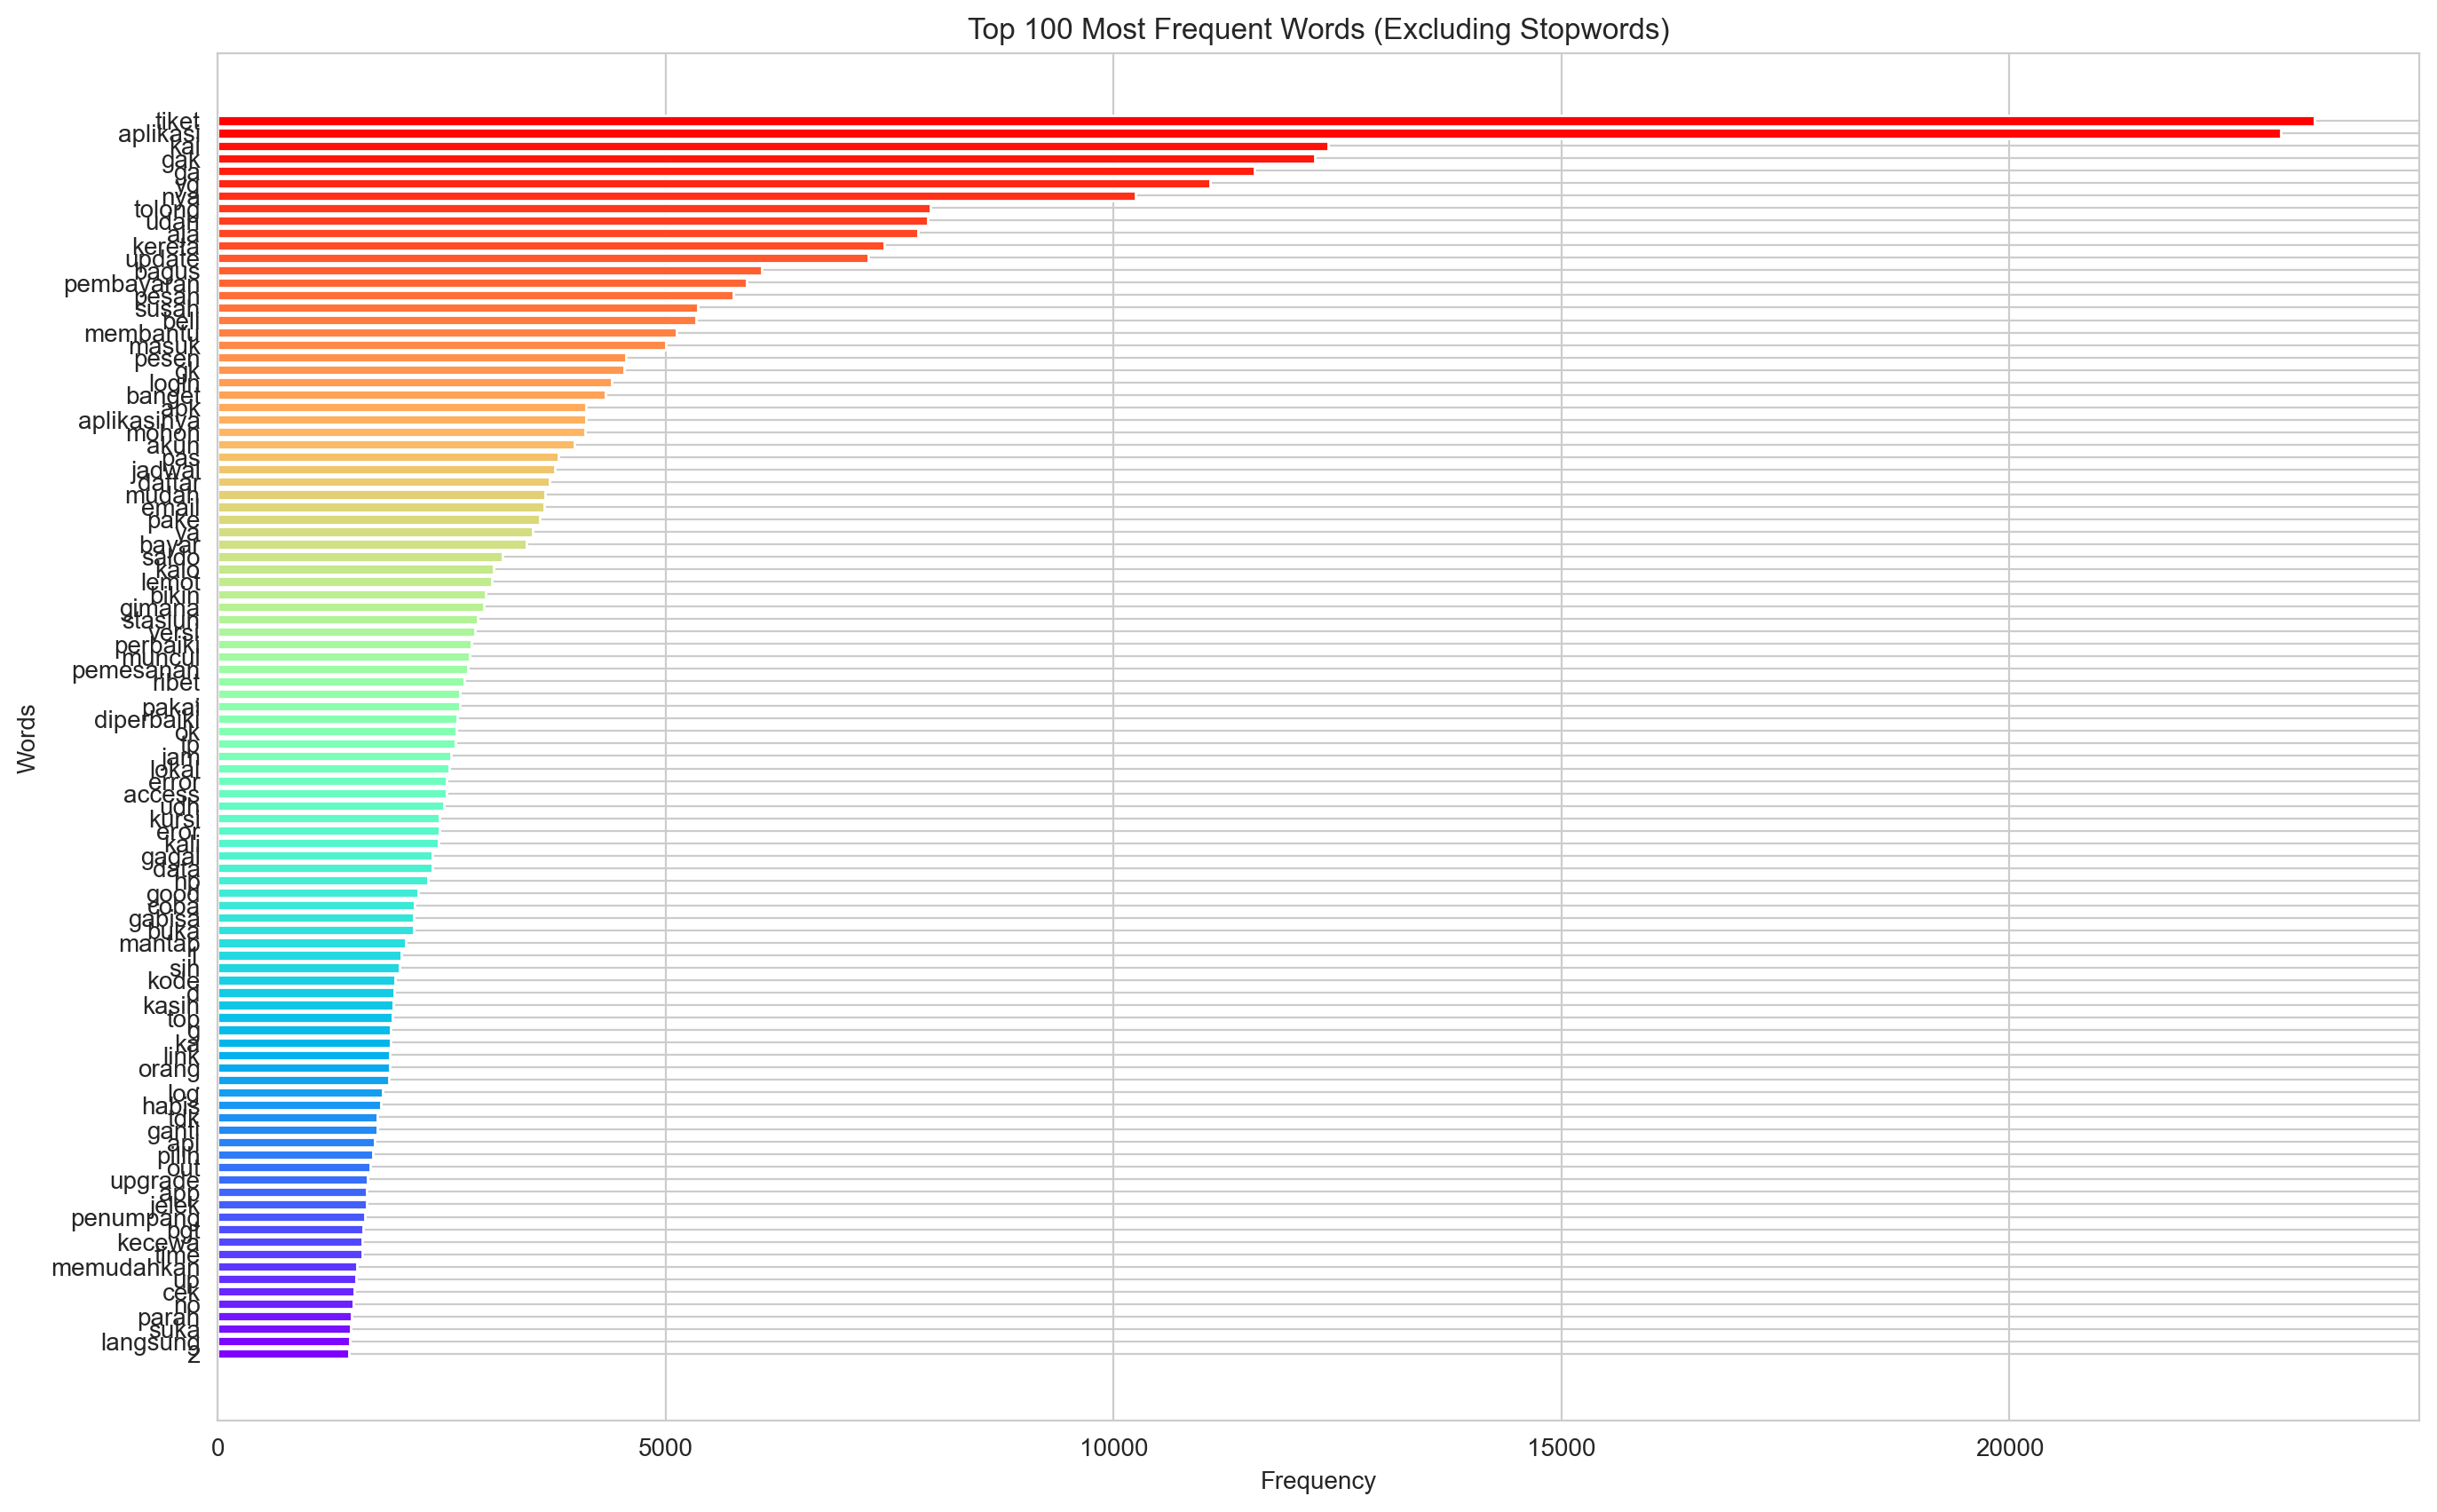

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content'
text_column = 'content'

# Combine all text data into one string
all_text = ' '.join(df_kai[text_column].dropna().astype(str))

# Tokenize words and remove stopwords
words = all_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()


In [64]:
common_words

[('tiket', 23406),
 ('aplikasi', 23024),
 ('kai', 12392),
 ('gak', 12245),
 ('ga', 11571),
 ('yg', 11078),
 ('nya', 10244),
 ('tolong', 7956),
 ('udah', 7923),
 ('aja', 7813),
 ('kereta', 7440),
 ('update', 7261),
 ('bagus', 6069),
 ('pembayaran', 5906),
 ('pesan', 5751),
 ('susah', 5357),
 ('beli', 5342),
 ('membantu', 5117),
 ('masuk', 5005),
 ('pesen', 4559),
 ('gk', 4536),
 ('login', 4402),
 ('banget', 4333),
 ('apk', 4113),
 ('aplikasinya', 4106),
 ('mohon', 4102),
 ('akun', 3984),
 ('pas', 3807),
 ('jadwal', 3766),
 ('daftar', 3701),
 ('mudah', 3652),
 ('email', 3644),
 ('pake', 3592),
 ('ya', 3513),
 ('bayar', 3449),
 ('saldo', 3178),
 ('kalo', 3080),
 ('lemot', 3060),
 ('bikin', 2990),
 ('gimana', 2973),
 ('stasiun', 2898),
 ('versi', 2876),
 ('perbaiki', 2834),
 ('muncul', 2808),
 ('pemesanan', 2790),
 ('ribet', 2754),
 (',', 2708),
 ('pakai', 2701),
 ('diperbaiki', 2676),
 ('ok', 2668),
 ('tp', 2658),
 ('jam', 2603),
 ('lokal', 2580),
 ('error', 2559),
 ('access', 2551),
 ('u

In [65]:
# Pastikan indonesian_stopwords berbentuk set
indonesian_stopwords = set(indonesian_stopwords)

# Add custom stopwords dari hasil top 100 frequent words
custom_stopwords = {
    # filler umum
    "ga", "gak", "gk", "udah", "udh", "aja", "aja", "aja", "ya", "tp", "bgt", "ok", "gw", "sih",
    # kata ganti/partikel
    "nya", "yg", "kalo", "d", "in",
    # tanda baca/angka
    ",", ".", "1", "2",
    # umum tidak bermakna kontekstual
    "aja", "mulu", "udah", "udh", "sampe"
}


# Pastikan kata-kata penting tidak ikut jadi stopwords
for word in ["aplikasi", "apk", "app"]:
    indonesian_stopwords.discard(word)

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)

print("Updated stopwords:", sorted(indonesian_stopwords))


Updated stopwords: [',', '.', '1', '2', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'aja', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-k

🔎 Words removed by custom stopwords:


,Word,Frequency
0,di,26750
1,bisa,26451
2,tidak,17122
3,saya,16981
4,dan,16715
...,...,...
620,bolehlah,1
621,perlukah,1
622,sajalah,1
623,seluruhnya,1


,Word,Frequency
0,tiket,23406
1,aplikasi,23024
2,kai,12392
3,tolong,7956
4,kereta,7440
...,...,...
95,semoga,1331
96,acces,1327
97,loading,1313
98,cepat,1292


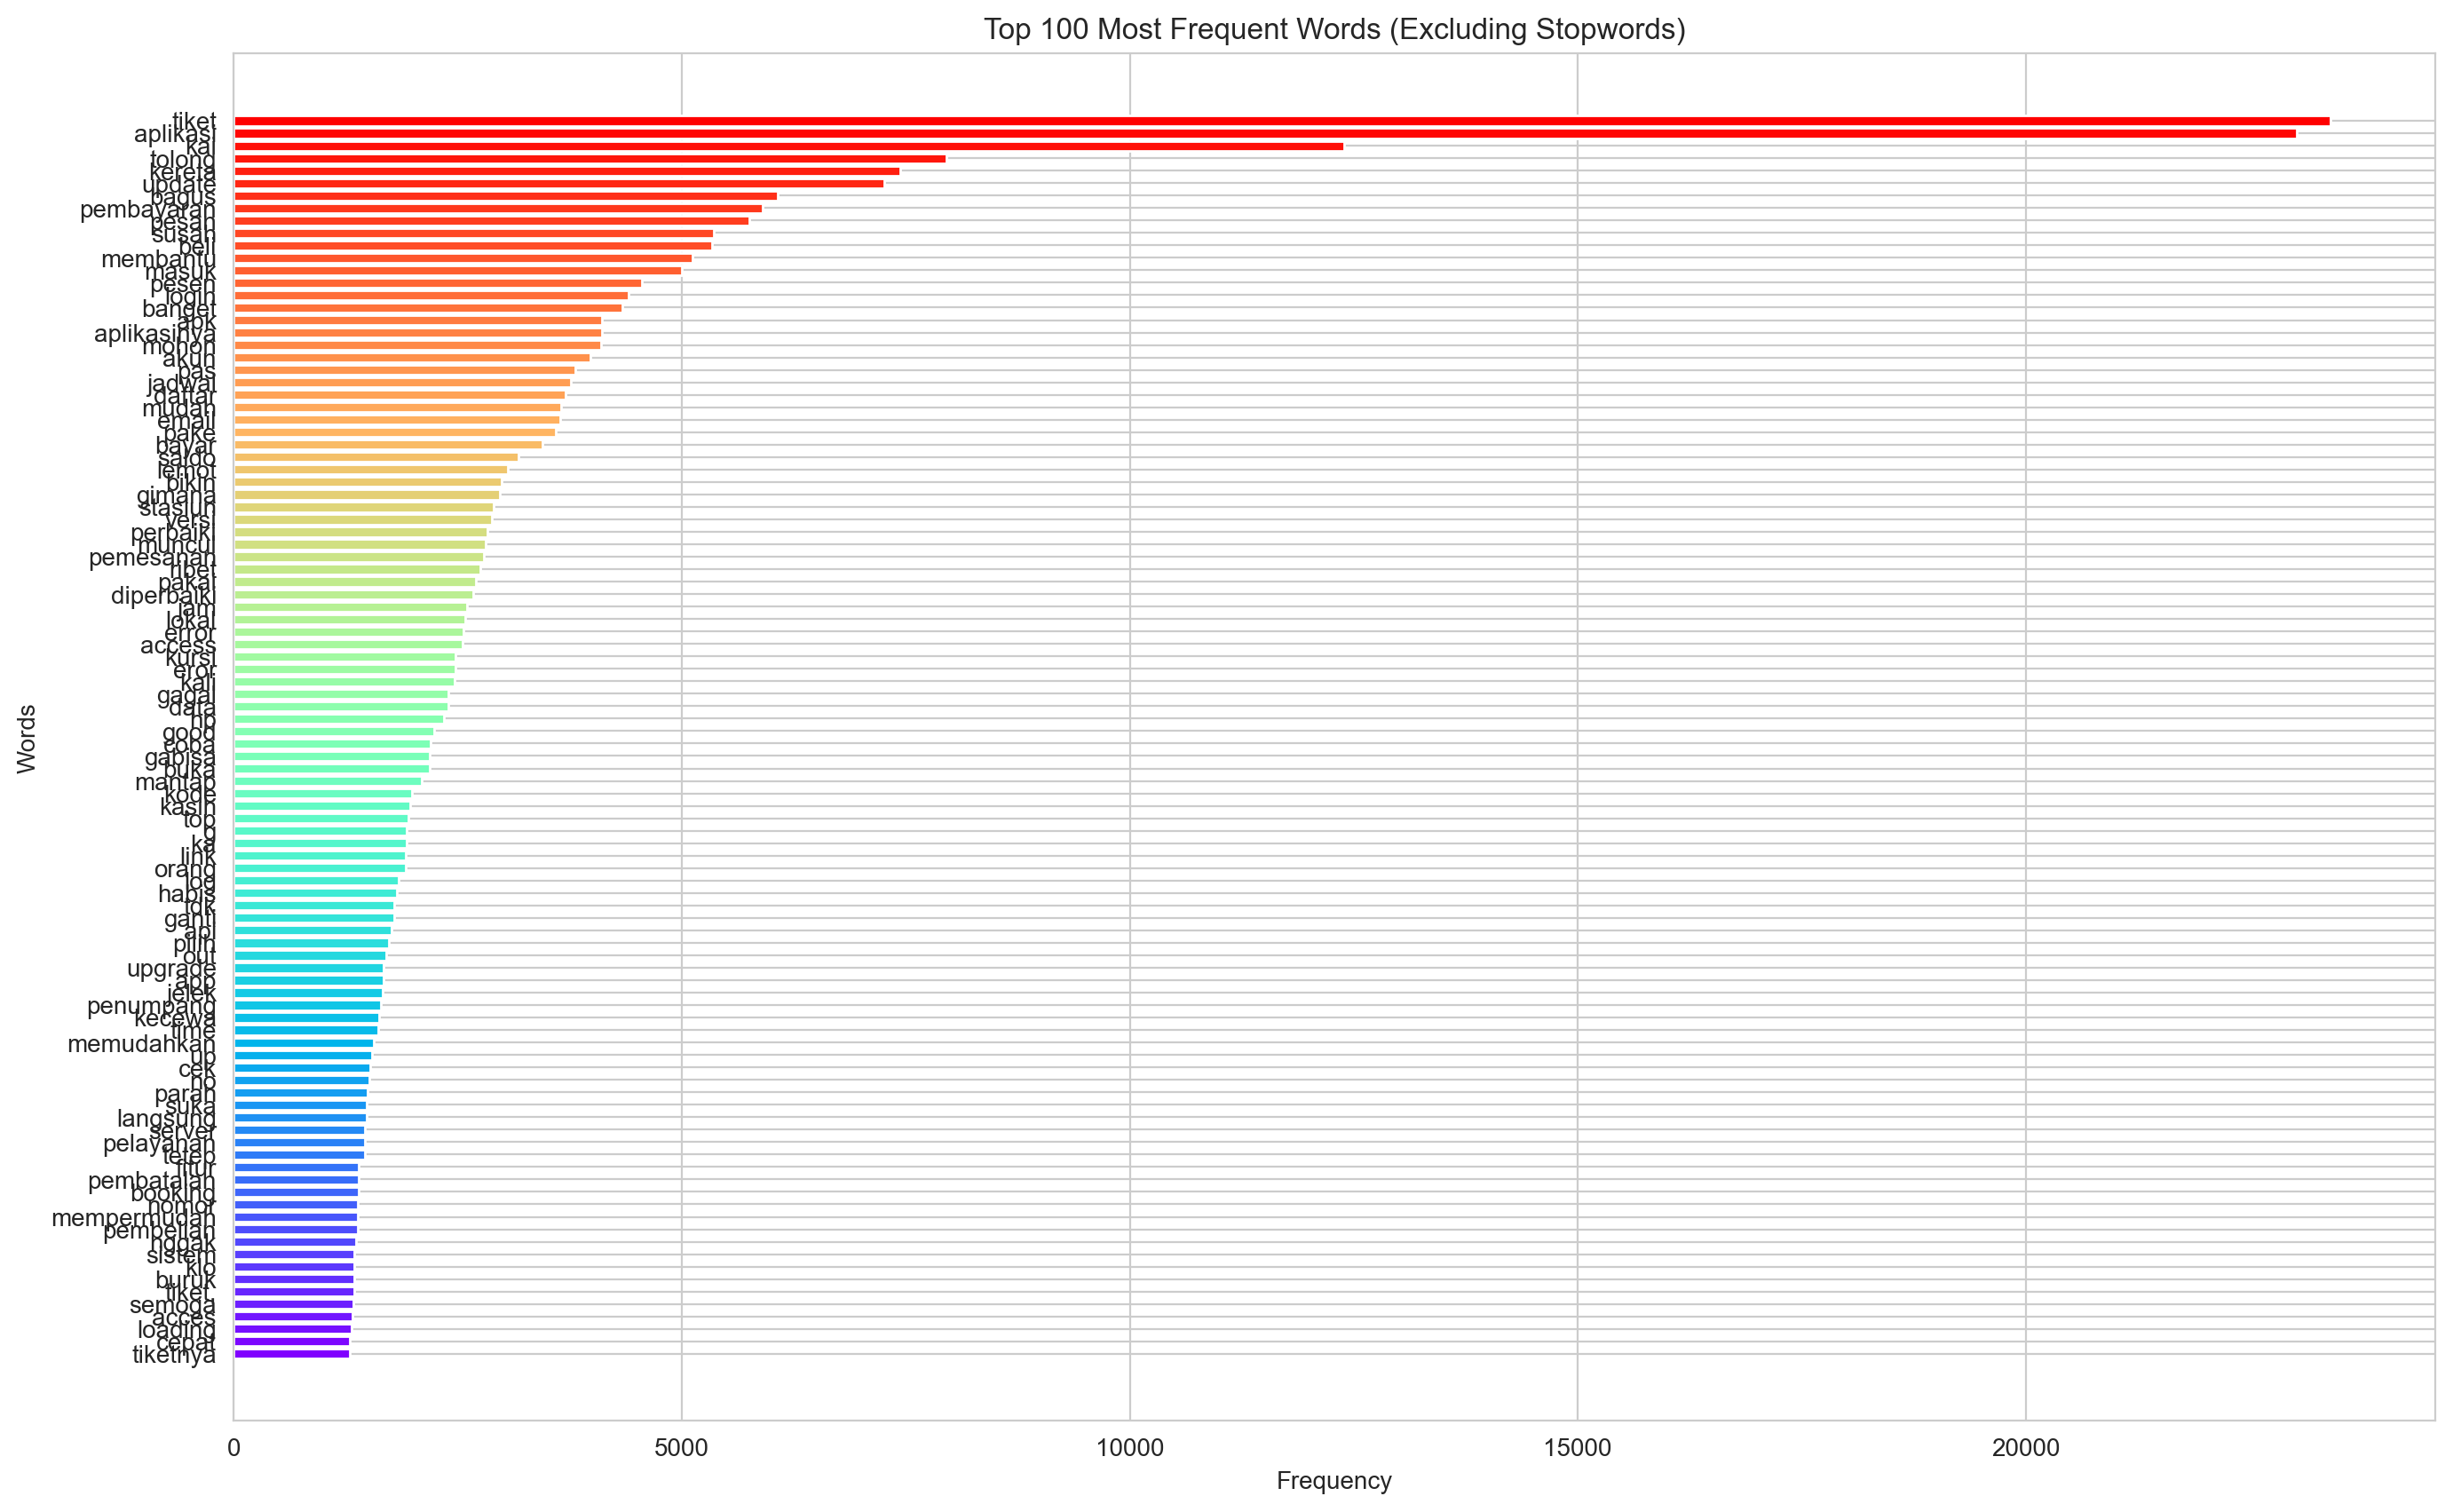

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming the text column is named 'content'
text_column = 'content'

# Combine all text data into one string
all_text = ' '.join(df_kai[text_column].dropna().astype(str))

# Tokenize words
words = [word.lower() for word in all_text.split()]

# Cari kata yang kehapus karena stopwords
removed_words = [word for word in words if word in indonesian_stopwords]

# Hitung frekuensi kata yang kehapus
removed_counts = Counter(removed_words)
removed_df = pd.DataFrame(removed_counts.most_common(), columns=['Word', 'Frequency'])

print("🔎 Words removed by custom stopwords:")
display(removed_df)

# Filter stopwords
filtered_words = [word for word in words if word not in indonesian_stopwords]

# Count frequent words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(100)

# Convert to DataFrame for better visualization
word_freq_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Display the most common words
display(word_freq_df)

# Plot the frequent words with rainbow colormap (horizontal barplot)
plt.figure(figsize=(16, 10))

# generate warna rainbow sesuai jumlah kata
colors = plt.cm.rainbow(np.linspace(0, 1, len(word_freq_df)))

# plot horizontal bar
bars = plt.barh(
    word_freq_df['Word'][::-1],
    word_freq_df['Frequency'][::-1],
    color=colors
)

plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 100 Most Frequent Words (Excluding Stopwords)")
plt.show()

In [67]:
# fungsi untuk hapus stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.lower().split()
        return ' '.join([w for w in words if w not in indonesian_stopwords])
    return text

# bikin kolom baru di dataframe
df_kai['clean_content'] = df_kai['content'].apply(remove_stopwords)

# cek hasil
print(df_kai[['content', 'clean_content']].head(10))

                                             content  \
0                                               good   
1                          susah di pemulihan akun..   
2  ribet harus ada member basic, begitu daftar ma...   
3  akses info perjalanan dengan kereta api lebih ...   
4                                             mantul   
5          aplikasi cacad kai, lemot, gk layak pakai   
6  baru juga di instal eh malah gag bisa di pakek...   
7                                              bagus   
8                                                top   
9  tolong beri metode pembayaran yang lain sepert...   

                                       clean_content  
0                                               good  
1                             susah pemulihan akun..  
2                 ribet member basic, daftar susah !  
3             akses info perjalanan kereta api cepat  
4                                             mantul  
5             aplikasi cacad kai, lemot, layak pakai 

In [68]:

df_kai['clean_tokens'] = df_kai['tokens'].apply(
    lambda toks: [w for w in toks if w not in indonesian_stopwords]
)

In [69]:

# Liat 5 baris pertama
print(df_kai[['content', 'tokens', 'clean_tokens']].head())

# Liat baris tertentu (misal index ke-100)
print(df_kai[['content', 'tokens', 'clean_tokens']].iloc[100])

# Kalau mau tampil rapi (pake Pandas display)
import pandas as pd
pd.set_option('max_colwidth', 200)  # biar teksnya ga dipotong
display(df_kai[['content', 'tokens', 'clean_tokens']].sample(5))


                                             content  \
0                                               good   
1                          susah di pemulihan akun..   
2  ribet harus ada member basic, begitu daftar ma...   
3  akses info perjalanan dengan kereta api lebih ...   
4                                             mantul   

                                              tokens  \
0                                             [good]   
1                   [susah, di, pemulihan, akun, ..]   
2  [ribet, harus, ada, member, basic, ,, begitu, ...   
3  [akses, info, perjalanan, dengan, kereta, api,...   
4                                           [mantul]   

                                    clean_tokens  
0                                         [good]  
1                   [susah, pemulihan, akun, ..]  
2       [ribet, member, basic, daftar, susah, !]  
3  [akses, info, perjalanan, kereta, api, cepat]  
4                                       [mantul]  
content         pemb

,content,tokens,clean_tokens
73639,"kenapa sekarang sering timeout mulu ya ini, pas pilih kursi sama mau bayar aja lama bgt","[kenapa, sekarang, sering, timeout, mulu, ya, ini, ,, pas, pilih, kursi, sama, mau, bayar, aja, lama, bgt]","[timeout, pas, pilih, kursi, bayar]"
106891,membantu sekali praktis,"[membantu, sekali, praktis]","[membantu, praktis]"
66622,tepat waktu,"[tepat, waktu]",[]
42375,saya mau bayar gak bisa aduh jadi pusing deh,"[saya, mau, bayar, gak, bisa, aduh, jadi, pusing, deh]","[bayar, aduh, pusing, deh]"
73088,"untuk pembatalan kai masih rumit via rekening, udah nungguin sebulan belum masuk kerekening, komplain ke stasiun terdekat katanya udah dikirim katanya suruh ke banknya minta rekening koran. yaudah...","[untuk, pembatalan, kai, masih, rumit, via, rekening, ,, udah, nungguin, sebulan, belum, masuk, kerekening, ,, komplain, ke, stasiun, terdekat, katanya, udah, dikirim, katanya, suruh, ke, banknya,...","[pembatalan, kai, rumit, via, rekening, nungguin, sebulan, masuk, kerekening, komplain, stasiun, terdekat, dikirim, suruh, banknya, rekening, koran, yaudah, ikhlasin, semoga, kedepannya, kai, memp..."


In [70]:
!pip install sastrawi


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Apply stemming ke clean_tokens
df_kai['stemmed_tokens'] = df_kai['clean_tokens'].apply(
    lambda toks: [stemmer.stem(w) for w in toks]
)

# Kalau mau bikin string lagi (buat TF-IDF atau ML klasik)
df_kai['final_text'] = df_kai['stemmed_tokens'].apply(lambda x: ' '.join(x))

# Cek hasil
print(df_kai[['content', 'clean_tokens', 'stemmed_tokens', 'final_text']].head())

                                                          content  \
0                                                            good   
1                                       susah di pemulihan akun..   
2  ribet harus ada member basic, begitu daftar masih juga susah !   
3             akses info perjalanan dengan kereta api lebih cepat   
4                                                          mantul   

                                    clean_tokens  \
0                                         [good]   
1                   [susah, pemulihan, akun, ..]   
2       [ribet, member, basic, daftar, susah, !]   
3  [akses, info, perjalanan, kereta, api, cepat]   
4                                       [mantul]   

                             stemmed_tokens                         final_text  
0                                    [good]                               good  
1                    [susah, pulih, akun, ]                  susah pulih akun   
2   [ribet, member, basic, da

In [73]:

# Kolom penting dari review
important_cols = ["content", "score", "thumbsUpCount",
                  "reviewCreatedVersion", "at",
                  "replyContent", "repliedAt"]

# Kolom hasil preprocessing
preproc_cols = ["tokens", "clean_tokens", "stemmed_tokens", "final_text"]

# Gabung jadi satu
df_preview = df_kai.loc[:, important_cols + preproc_cols]

# Biar teks ga kepotong
import pandas as pd
pd.set_option('max_colwidth', 150)

# Tampilkan sample 5 row
display(df_preview.sample(5))

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,tokens,clean_tokens,stemmed_tokens,final_text
59087,susah untuk login ke aplikasinya,1,0,None,2021-06-10 15:58:32,"halo kak, kendala loginnya seperti apa ya? bisa didetilkan kembali kendalanya? untuk bantuan aplikasi lebih lanjut bisa hubungi kami di email cs@k...",2021-06-12 12:36:32,"[susah, untuk, login, ke, aplikasinya]","[susah, login, aplikasinya]","[susah, login, aplikasi]",susah login aplikasi
62391,saya mau daftar akun kok gak bisa ya?,1,0,4.4.7,2021-04-02 08:39:23,None,NaT,"[saya, mau, daftar, akun, kok, gak, bisa, ya, ?]","[daftar, akun, ?]","[daftar, akun, ]",daftar akun
72268,mau tanya ini aplikasi apa sudah ngga aktif lg??? pesen tiket sja lauma buanget terus timeout terus,1,0,4.2.0,2020-02-19 13:21:59,None,NaT,"[mau, tanya, ini, aplikasi, apa, sudah, ngga, aktif, lg, ?, ?, ?, pesen, tiket, sja, lauma, buanget, terus, timeout, terus]","[aplikasi, ngga, aktif, lg, ?, ?, ?, pesen, tiket, sja, lauma, buanget, timeout]","[aplikasi, ngga, aktif, lg, , , , sen, tiket, sja, lauma, buanget, timeout]",aplikasi ngga aktif lg sen tiket sja lauma buanget timeout
73095,"minta tolong, agar aplikasi ini diperbaiki kembali. kami para calon penumpang kereta api sangat kecewa. menurut saya harusnya kai dikelola swasta ...",1,0,4.0.1,2020-02-06 14:15:35,None,NaT,"[minta, tolong, ,, agar, aplikasi, ini, diperbaiki, kembali, ., kami, para, calon, penumpang, kereta, api, sangat, kecewa, ., menurut, saya, harus...","[tolong, aplikasi, diperbaiki, calon, penumpang, kereta, api, kecewa, kai, dikelola, swasta]","[tolong, aplikasi, baik, calon, tumpang, kereta, api, kecewa, kai, kelola, swasta]",tolong aplikasi baik calon tumpang kereta api kecewa kai kelola swasta
68954,"udah bolak balik download dan uninstal tp ttp bae ga bisa masuk aplikasi nya, katanya bisa pembatalan lewat online tp masuk aplikasinya aj ga bisa",1,0,None,2020-04-29 04:02:13,"halo kak, ga bisa masuknya gimana ya kak? bisa dijelaskan kembali kendalanya agar bisa kami bantu",2020-04-29 04:40:49,"[udah, bolak, balik, download, dan, uninstal, tp, ttp, bae, ga, bisa, masuk, aplikasi, nya, ,, katanya, bisa, pembatalan, lewat, online, tp, masuk...","[bolak, download, uninstal, ttp, bae, masuk, aplikasi, pembatalan, online, masuk, aplikasinya, aj]","[bolak, download, uninstal, ttp, bae, masuk, aplikasi, batal, online, masuk, aplikasi, aj]",bolak download uninstal ttp bae masuk aplikasi batal online masuk aplikasi aj


In [74]:
# CLEAN data (lengkap dengan preprocessing)
df_kai_clean = df_kai.loc[:, [
    "content", "score", "thumbsUpCount", "reviewCreatedVersion", "at",
    "replyContent", "repliedAt", "tokens", "clean_tokens", "stemmed_tokens", "final_text"
]]
df_kai_clean.to_csv("df_kai_clean.csv", index=False)
